In [1]:
#Import Packages
import os
import pandas as pd
import numpy as np
import rasterio as rio

#Change Working Directory

#FSLAM
os.chdir(r'C:\Users\malva\Thesis\GIS\Layers\Raster\ValdAran')
fslam_dry = rio.open("PROB_uncond_unst.asc")
fslam_event = rio.open("PROB_failure_final_cond.asc")

#LR
os.chdir(r'C:\Users\malva\Thesis\Files\Results')
lr_norain = rio.open("logreg_norain_prob.tif")
lr_rain = rio.open("logreg_rain_prob.tif")

In [3]:
%%time
#Convert Rasters to 2D Arrays
fslam_dry_arr = fslam_dry.read(1)
fslam_event_arr = fslam_event.read(1)
lr_norain_arr = lr_norain.read(1)
lr_rain = lr_rain.read(1)

Wall time: 25.4 s


In [6]:
#Create Data Frame <- 2D Arrays have to transformed to 1D
df_lr = pd.DataFrame()
df_fslam = pd.DataFrame()

df_lr['norain'] = lr_norain_arr.ravel()
df_lr['rain'] = lr_rain.ravel()
df_fslam['dry'] = fslam_dry_arr.ravel()
df_fslam['event'] = fslam_event_arr.ravel()

In [7]:
df_lr.head()

,norain,rain
0,0.588890,0.590891
1,0.231596,0.156858
2,0.229225,0.154556
3,0.227920,0.153494
4,0.239951,0.168941


In [23]:
#Histograms
hist_bins = np.linspace(0, 1, 21)
np_bins = np.concatenate((np.array([0]), np.linspace(0.025, 0.975, 20), np.array([1])), axis=None)

count_fslam_dry = np.histogram(df_fslam['dry'], bins = np_bins)[0]
count_fslam_event = np.histogram(df_fslam['event'], bins = np_bins)[0]
count_lr_norain = np.histogram(df_lr['norain'], bins = np_bins)[0]
count_lr_rain = np.histogram(df_lr['rain'], bins = np_bins)[0]

sum_count_fslam_dry = np.cumsum(count_fslam_dry/np.sum(count_fslam_dry))
sum_count_fslam_event = np.cumsum(count_fslam_event/np.sum(count_fslam_event))
sum_count_lr_norain = np.cumsum(count_lr_norain/np.sum(count_lr_norain))
sum_count_lr_rain = np.cumsum(count_lr_rain/np.sum(count_lr_rain))

In [33]:
sum_count_fslam_event

array([0.4540636 , 0.51829089, 0.5566584 , 0.586284  , 0.61142367,
       0.63400596, 0.65454024, 0.67265497, 0.6895333 , 0.70558926,
       0.72112424, 0.73575819, 0.75017955, 0.76432463, 0.77806791,
       0.79135928, 0.80450214, 0.81852752, 0.83450189, 0.85845511,
       1.        ])

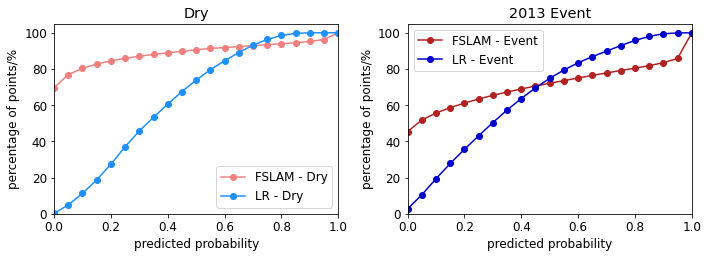

In [31]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.75))

axes[0].plot(hist_bins, sum_count_fslam_dry*100, marker='o', color='lightcoral', label='FSLAM - Dry')
axes[0].plot(hist_bins, sum_count_lr_norain*100, marker='o', color='dodgerblue', label='LR - Dry')
axes[0].set_ylim(0,105)
axes[0].set_title('Dry')
axes[0].set_xlabel('predicted probability')
axes[0].set_ylabel('percentage of points/%')
axes[0].legend()
axes[0].set_xlim([0, 1])
axes[1].plot(hist_bins, sum_count_fslam_event*100, marker='o', color='firebrick', label='FSLAM - Event')
axes[1].plot(hist_bins, sum_count_lr_rain*100, marker='o', color='mediumblue', label='LR - Event')
axes[1].set_ylim(0,105)
axes[1].set_title('2013 Event')
axes[1].set_xlabel('predicted probability')
axes[1].set_ylabel('percentage of points/%')
axes[1].legend()
axes[1].set_xlim([0, 1])


plt.tight_layout()
plt.savefig(r'C:\Users\malva\Desktop\Test\cdf-map.png', bbox_inches = 'tight', facecolor='white', edgecolor='white', dpi=300)
plt.show()